In [1]:
import torch
from torch.utils.data import DataLoader
from vqvae import VQVAE
from torchvision import datasets, transforms, utils
import matplotlib.pyplot as plt

In [3]:
model = VQVAE()
weights = torch.load('good_run.pyt')

In [3]:
model.load_state_dict(weights)

<All keys matched successfully>

In [43]:
imgs

2

In [33]:
transform = transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(256),
            transforms.ToTensor(),
            transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),
        ])
dataset = datasets.ImageFolder('/share/lazy/will/ConstrastiveLoss/Imgs/color_images/train/', transform=transform)
loader = DataLoader(dataset, batch_size=16, shuffle=True, pin_memory = True)


In [34]:
utils.save_image(
    sample,
    f"sample/validation.png",
    nrow=16,
    normalize=True,
    range=(-1, 1),
    )
# sample[0][0].numpy()*255

In [35]:
with torch.no_grad():
    for imgs, _ in loader:
        samp = imgs
        sample, _ = model(imgs)
        break

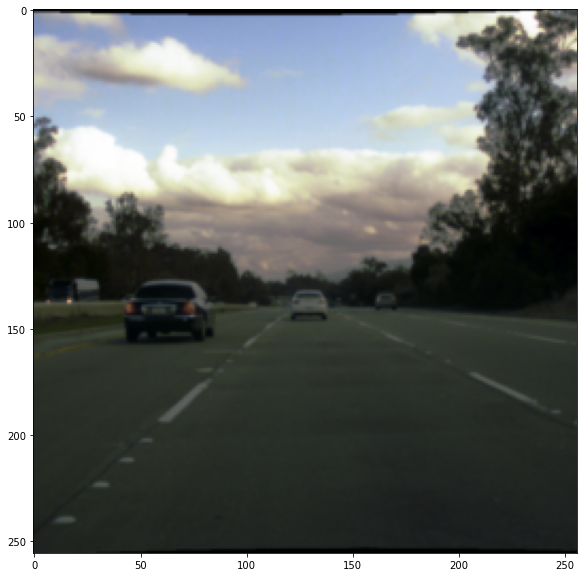

In [36]:
test_img = 255*(imgs[0]+1)/2
plt.imshow(test_img.int().numpy().transpose(1,2,0))
plt.show()

In [37]:
sample[0].shape

torch.Size([3, 256, 256])

In [2]:
# plt.rcParams["figure.figsize"] = (10,10)
normalized = 255*(sample[0]+1)/2
test = normalized.round().int().numpy().transpose(1,2,0)
test
# plt.imshow(test)
# plt.show()

NameError: name 'sample' is not defined